<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Assignment6(Q1)_ArnavBarman_3CO15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

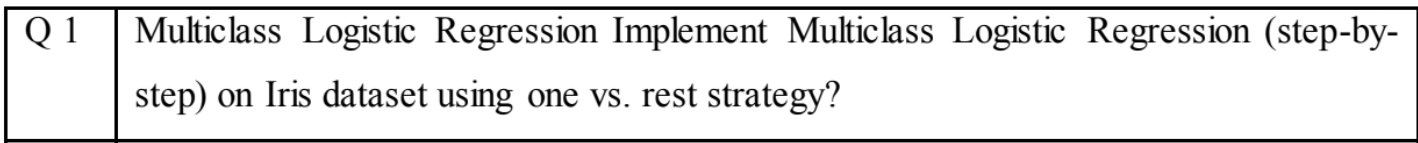

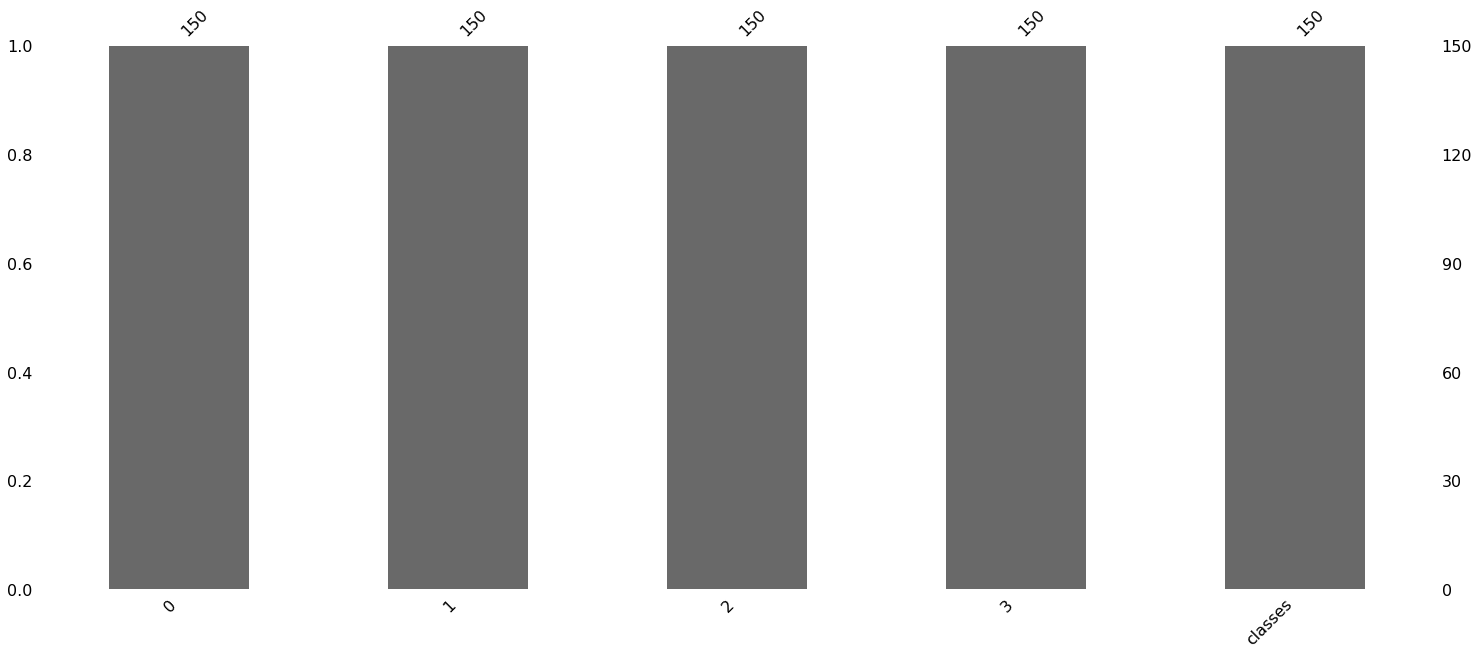

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data)
df['classes'] = iris.target
import missingno as ms
ms.bar(df)

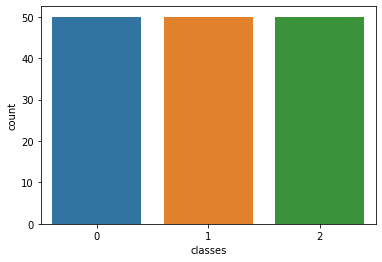

In [ ]:
import seaborn as sns
sns.countplot(x=df['classes'])

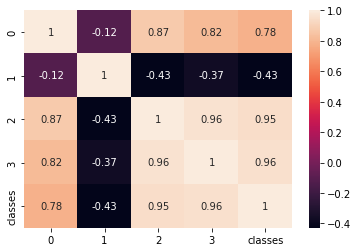

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = scaler.fit_transform(X)
X = np.insert(X,0,values=1,axis=1)
classes = y.unique()
classes

array([0, 1, 2])

In [ ]:
df_y = pd.DataFrame()
for i in classes:
  colname = 'y_'+ str(i)
  temp = np.zeros(len(y))
  for j in range(len(y)): 
    if i == y[j]: temp[j] = 1
  df_y[colname] = temp
print(df_y.shape)
y.value_counts()

(150, 3)


0    50
1    50
2    50
Name: classes, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.2, random_state=30)
def GDO(X_train,Y_train):
  n=1000
  alpha=0.01 
  m,k=X_train.shape 
  beta=np.zeros(k)
  for i in range(n): 
    cost_gradient=np.zeros(k) 
    z=X_train.dot(beta) 
    predicted=1/(1+np.exp(-z)) 
    difference=predicted-Y_train
    for j in range(k): 
      cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
    for j in range(k): 
      beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
  return beta

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
output = []
for cls in range(len(classes)):
  beta = GDO(X_train,y_train.iloc[:,cls])
  output.append(1/(1+np.exp(-(X_test.dot(beta)))))

accuracy = 0
for i in range(len(classes)):
  for j in range(len(y_test)):
    if y_test.iloc[j,i] == 1 and output[i][j]>=0.5:
      accuracy += 1
print(accuracy/len(X_test))

0.8666666666666667


---